In [62]:
#importing the libraries and Models

import pandas as pd #numeric calculations
import numpy as np #numeric calculations
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
import re #regular expressions for text cleaning

#scikit-learn models and functions for ML training
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier #multi-layer perceptron classifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score , roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix
#warnings supperssion
import warnings
warnings.filterwarnings("ignore")



In [63]:
#NLTK LIBRARIES AND RESOURCES
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aarat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aarat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aarat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [64]:
#loading dataset
df = pd.read_excel(r"C:\Users\aarat\Desktop\Bvoc IT\sem6\proj_s6\main\emscad_cleaned_excel.xlsx")

DATA CLEANING & PREPROCESSING

In [65]:
#analysing the dataset

df.info() #to get the datatype of the data's

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   department           17880 non-null  object
 3   company_profile      17880 non-null  object
 4   description          17871 non-null  object
 5   requirements         17832 non-null  object
 6   benefits             17839 non-null  object
 7   telecommuting        17880 non-null  int64 
 8   has_company_logo     17880 non-null  int64 
 9   has_questions        17880 non-null  int64 
 10  employment_type      17880 non-null  object
 11  required_experience  17880 non-null  object
 12  required_education   17880 non-null  object
 13  industry             17880 non-null  object
 14  function             17880 non-null  object
 15  fraudulent           17880 non-null  int64 
 16  coun

In [66]:
df.head()


,job_id,title,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,state,city
0,69,New Product Development Project Leader,"""""",We Provide Full Time Permanent Positions for m...,(We have more than 1500 Job openings in our we...,"""""","""""",0,0,0,Full-time,"""""","""""","""""","""""",0,US,OH,Cincinnati
1,723,Process Improvement Project Engineering Manager,"""""",We Provide Full Time Permanent Positions for m...,(We have more than 1500+ Job openings in our w...,"""""","""""",0,0,0,Full-time,"""""","""""","""""","""""",0,US,OH,Cincinnati
2,1094,Manufacturing Engineering - Lean Manufacture,"""""",We Provide Full Time Permanent Positions for m...,(We have more than 1500+ Job openings in our w...,"""""","""""",0,0,0,Full-time,"""""","""""","""""","""""",0,US,OH,Cincinnati
3,2141,Food Quality,"""""",We Provide Full Time Permanent Positions for m...,(We have more than 1500+ Job openings in our w...,"""""","""""",0,0,0,Full-time,"""""","""""","""""","""""",0,US,OH,Cincinnati
4,2252,Electrical Maintenance Technician,"""""",We Provide Full Time Permanent Positions for m...,(We have more than 1500+ Job openings in our w...,"""""","""""",0,0,0,Full-time,"""""","""""","""""","""""",0,US,OH,Cleveland


In [67]:
df.columns #to get the column names in dataset

Index(['job_id', 'title', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'telecommuting', 'has_company_logo',
       'has_questions', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function', 'fraudulent', 'country',
       'state', 'city'],
      dtype='object')

In [68]:
print(df)

       job_id                                              title  \
0          69             New Product Development Project Leader   
1         723    Process Improvement Project Engineering Manager   
2        1094       Manufacturing Engineering - Lean Manufacture   
3        2141                                       Food Quality   
4        2252                  Electrical Maintenance Technician   
...       ...                                                ...   
17875   17348                           Patient Care Coordinator   
17876   17432        SA807: Object detection and embedded vision   
17877   17557  Customer Service Representative to Enroll Peop...   
17878   17731                      Licensed Life Insurance Agent   
17879   17759                                 Personal Assistant   

             department                                    company_profile  \
0                    ""  We Provide Full Time Permanent Positions for m...   
1                    ""  We

In [69]:
df["fraudulent"].value_counts() #to get the fraudulent value counts 0 - real , 1-fake

fraudulent
0    17014
1      866
Name: count, dtype: int64

In [70]:
df["fraudulent"].value_counts(normalize=True)*100

fraudulent
0    95.1566
1     4.8434
Name: proportion, dtype: float64

In [71]:
df.isnull().sum() #null values in dataset

job_id                  0
title                   0
department              0
company_profile         0
description             9
requirements           48
benefits               41
telecommuting           0
has_company_logo        0
has_questions           0
employment_type         0
required_experience     0
required_education      0
industry                0
function                0
fraudulent              0
country                 0
state                   0
city                    1
dtype: int64

In [72]:
df.isnull().sum().sum()

99

In [73]:
print(df.shape)
print(df.columns)
#here print used for printing the output of both lines of code

(17880, 19)
Index(['job_id', 'title', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'telecommuting', 'has_company_logo',
       'has_questions', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function', 'fraudulent', 'country',
       'state', 'city'],
      dtype='object')


In [74]:
#filling the null values
text_cols = ["description", "benefits", "city", "requirements"]
df[text_cols] = df[text_cols].fillna("unknown")

In [75]:
#joining the contexts for easy identification for ml model

text_join = ["title","description","company_profile","requirements","benefits"]
df['text']= df[text_join].agg(' '.join,axis =1)
df['text']

0        New Product Development Project Leader (We hav...
1        Process Improvement Project Engineering Manage...
2        Manufacturing Engineering - Lean Manufacture (...
3        Food Quality (We have more than 1500+ Job open...
4        Electrical Maintenance Technician (We have mor...
                               ...                        
17875    Patient Care Coordinator We are currently look...
17876    SA807: Object detection and embedded vision ME...
17877    Customer Service Representative to Enroll Peop...
17878    Licensed Life Insurance Agent We need someone ...
17879    Personal Assistant Job DescriptionVertex Globa...
Name: text, Length: 17880, dtype: object

In [76]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text


df["clean_text"] = df['text'].apply(clean_text)



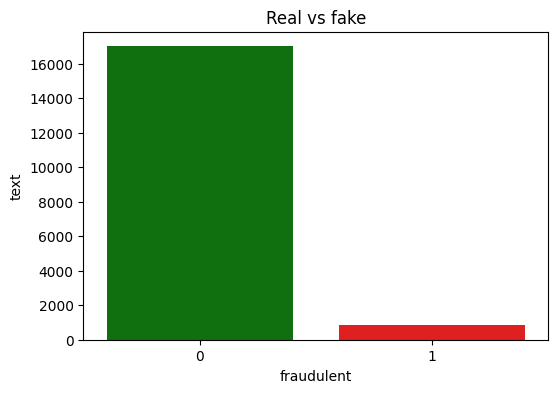

In [77]:
#count plot graph for showing Real & fake values
plt.figure(figsize=(6,4))
sns.countplot(x = df["fraudulent"],palette=["green","red"])
plt.title("Real vs fake")
plt.xlabel("fraudulent")
plt.ylabel("text")
plt.show()

EXPLORATORY DATA ANALYSIS

                    job_id  telecommuting  has_company_logo  has_questions  \
job_id            1.000000      -0.004559         -0.014539      -0.087025   
telecommuting    -0.004559       1.000000         -0.019836       0.020345   
has_company_logo -0.014539      -0.019836          1.000000       0.233932   
has_questions    -0.087025       0.020345          0.233932       1.000000   
fraudulent        0.079872       0.034523         -0.261971      -0.091627   

                  fraudulent  
job_id              0.079872  
telecommuting       0.034523  
has_company_logo   -0.261971  
has_questions      -0.091627  
fraudulent          1.000000  


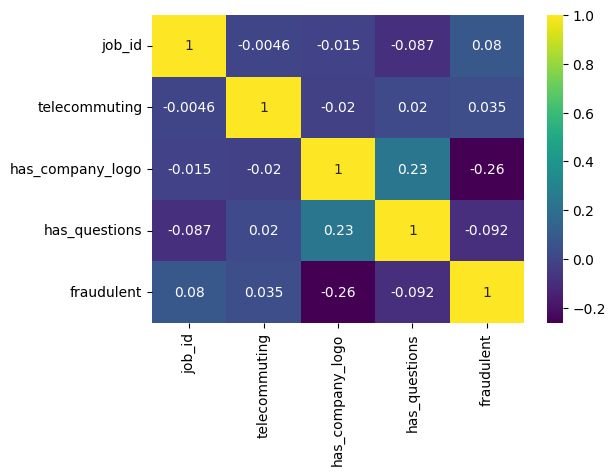

In [78]:
#Exploratory Analysis

#to create a correlation matrix to study the relationship btw numeric data
numeric_df = (df.select_dtypes(include=('Int64','Float64'))).corr()#computing correlation
print(numeric_df)

#plotting the correlation matrix in heat map
plt.figure(figsize=(6,4))
sns.heatmap(numeric_df,cmap="viridis",annot=True,fmt=".2g")
plt.show()
#


Number of outliers detected: 668


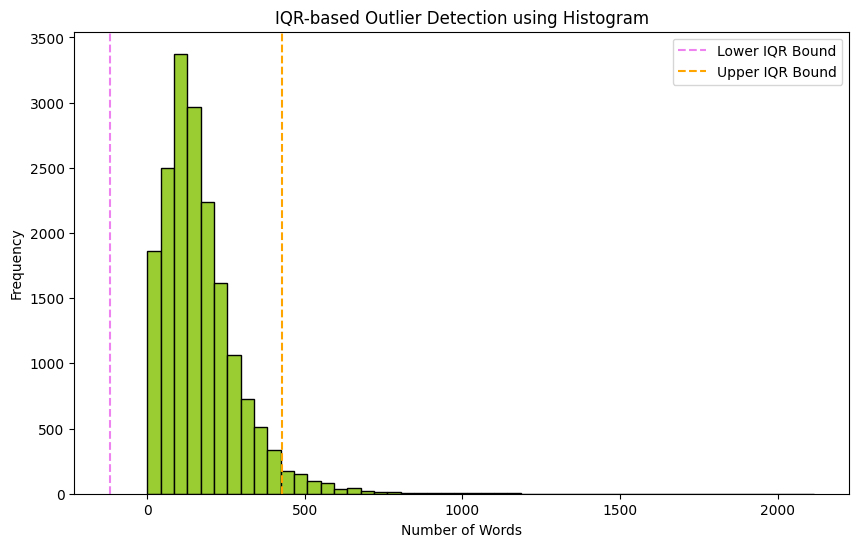

In [79]:
#iqr method for outlier detection
df["text_length"] = df["description"].apply(lambda x: len(str(x).split()))
q1 = df["text_length"].quantile(0.25)
q3 = df["text_length"].quantile(0.75)
iqr = q3-q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df["text_length"] < lower_bound) | (df["text_length"] > upper_bound)]
print("Number of outliers detected:", outliers.shape[0])

plt.figure(figsize=(10,6))
plt.hist(df["text_length"], bins=50 , color = 'yellowgreen', edgecolor = 'black' )
plt.axvline(lower_bound, linestyle='--', label='Lower IQR Bound', color = 'violet')
plt.axvline(upper_bound, linestyle='--', label='Upper IQR Bound', color = 'orange')
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.title("IQR-based Outlier Detection using Histogram")
plt.legend()
plt.show()

In [80]:
us_df = df[df["country"]=="US"] #filtering only US states
us_df =us_df[us_df["state"]!='""']
print(us_df["state"].unique())

[' OH' ' PA' ' MA' ' IL' ' MN' ' MI' ' CA' ' WI' ' MO' ' GA' ' WA' ' FL'
 ' NY' ' TX' ' IN' ' CT' ' KY' ' VA' ' NV' ' DC' ' NJ' ' KS' ' DE' ' NC'
 ' TN' ' LA' ' OK' ' OR' ' MD' ' UT' ' AK' ' ID' ' NE' ' SD' ' ME' ' WY'
 ' IA' ' AZ' ' CO' ' SC' ' NM' ' RI' ' AR' ' MT' ' WV' ' ND' ' NH' ' MS'
 ' AL' ' HI' ' VT']


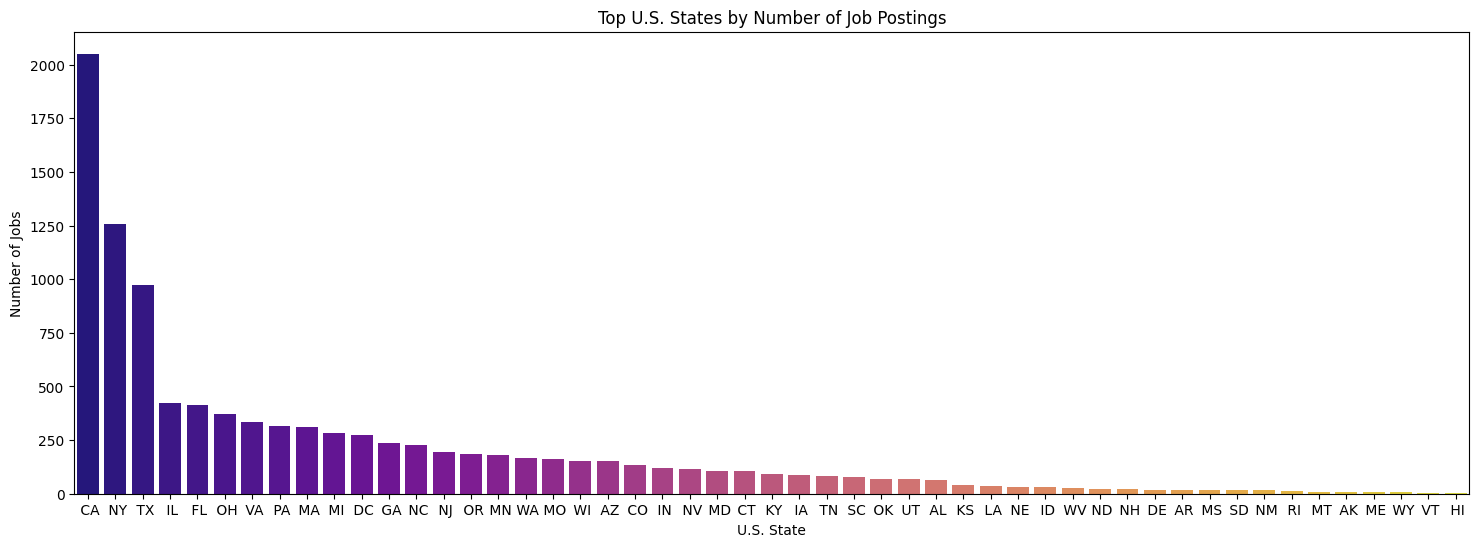

In [81]:
#bar chart plots that in which state in us produces the greatest number of jobs

state_count = us_df["state"].value_counts()
state_count = state_count[state_count.index != '""'] #removing the null values from state column
plt.figure(figsize=(18,6))
sns.barplot(x=state_count.index, y=state_count.values ,palette="plasma",)
plt.title("Top U.S. States by Number of Job Postings")
plt.xlabel("U.S. State")
plt.ylabel("Number of Jobs")
plt.show()

country
US    730
AU     40
GB     23
MY     12
CA     12
QA      6
BH      5
IN      4
PL      3
TW      2
ID      1
SA      1
BR      1
ZA      1
PK      1
PH      1
EG      1
ES      1
EE      1
AE      1
Name: count, dtype: int64


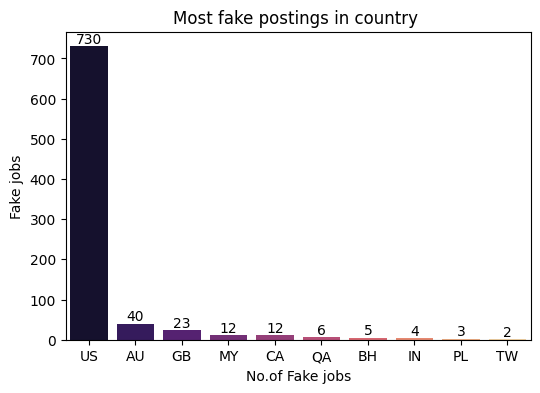

In [82]:
#In which country has most fake jobs
fake_df = df[df["fraudulent"]==1]
fake_df=fake_df[fake_df["country"] != '""']
country_fake = fake_df["country"].value_counts()
print(country_fake)
#converting to df
country_fake_df = country_fake.to_frame(name="Fake jobs")
top10_countries = country_fake_df.head(10)

#using bar chart for plotting it

plt.figure(figsize=(6,4))
sns.barplot(x=top10_countries.index , y =top10_countries["Fake jobs"] ,palette="magma")

#this loop is used for representing the value of each bar.
for i, value in enumerate(top10_countries["Fake jobs"]): #i-position of bar , value - no.of fake jobs
    plt.text(i, value, str(value), ha="center", va="bottom") 

plt.title("Most fake postings in country ")
plt.xlabel("No.of Fake jobs")
plt.show()
#percentage case

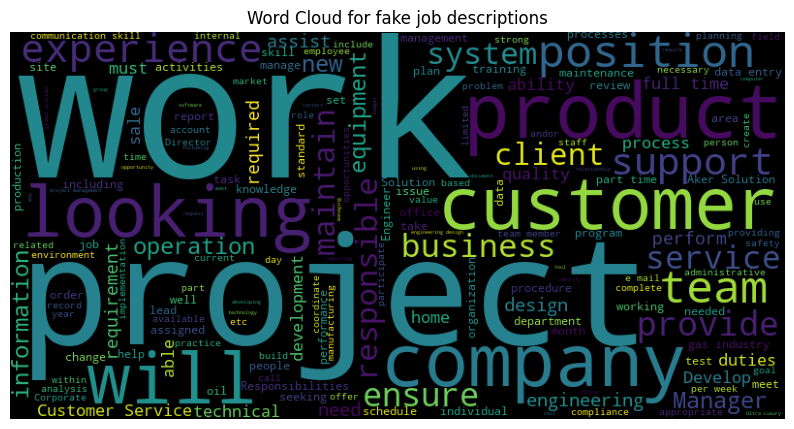

In [83]:
#word cloud visualization
from wordcloud import WordCloud
fake_jobs = " ".join(df[df["fraudulent"]==1]['description'].astype(str))

plt.figure(figsize=(10,6))
wc = WordCloud(width = 800 , height = 400).generate(fake_jobs)
plt.axis("off")
plt.imshow(wc)
plt.title("Word Cloud for fake job descriptions")
plt.show()

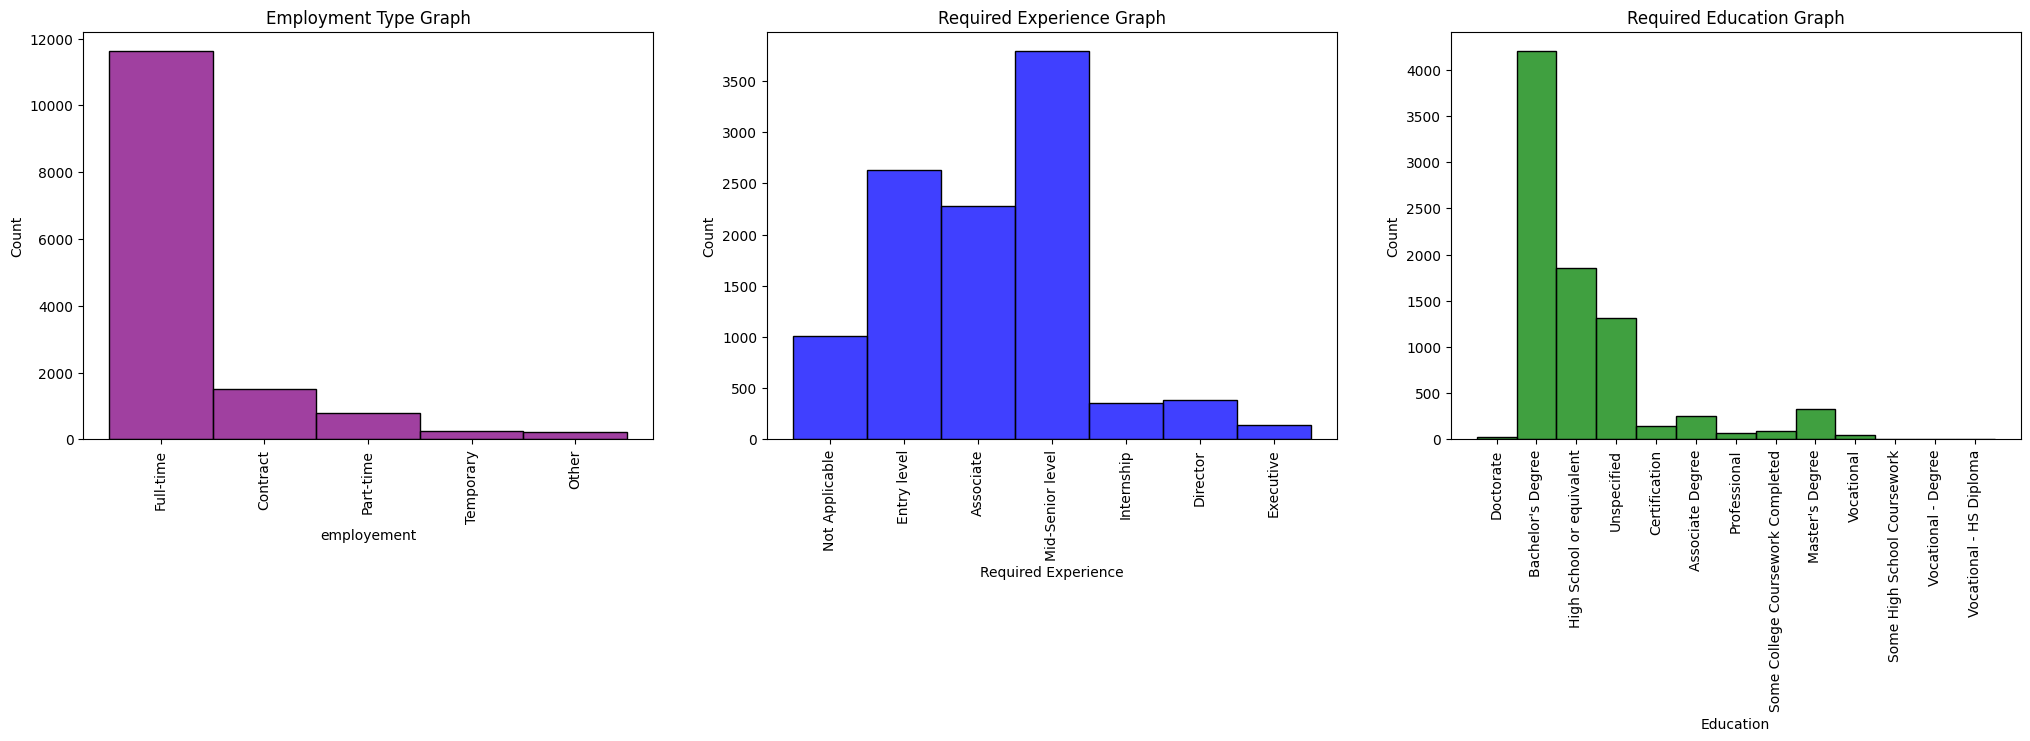

In [84]:
#plots to see the distribution of continous features indivdually

plt.figure(figsize=(25,18))

df = df[df["employment_type"] != '""']
plt.subplot(3,3,1)
sns.histplot(df["employment_type"],color="purple")
plt.title("Employment Type Graph")
plt.xlabel("employement")
plt.xticks(rotation=90)

df = df[df["required_experience"] != '""']
plt.subplot(3,3,2)
sns.histplot(df["required_experience"],color="blue")
plt.title("Required Experience Graph")
plt.xlabel("Required Experience")
plt.xticks(rotation=90)

df = df[df["required_education"] != '""']
plt.subplot(3,3,3)
sns.histplot(df["required_education"],color="green")
plt.title("Required Education Graph")
plt.xlabel("Education")
plt.xticks(rotation=90)

plt.show()

In [85]:
for state in df["state"]:
    print(state)

#print(df["state"])

 MN
 NY
 OK
 FL
 FL
 VA
 TX
 MA
 FL
 CA
 NY
 CA
 IN
 NY
 IL
 CA
 CA
 NY
""
 KY
 NJ
 NC
 CA
 NY
 CA
 OR
 MI
 TX
 CA
 CA
 FL
 MN
 TX
 CA
 CA
 CA
 CA
 TX
 DE
 DE
 FL
 CA
 FL
 IL
 CA
 OR
 VA
 PA
 KY
 GA
 CA
 VA
 VA
 NY
 CA
 PA
 IL
 MD
 PA
 VA
 DC
 FL
 NY
 NY
 NY
 DC
 PA
 GA
 DC
 NY
 CA
 CA
 CA
 CA
 NY
 FL
 CA
 DC
 VA
 GA
 CA
 CA
 CA
 GA
 CO
 NY
 NY
 IL
 OR
 MD
 TX
""
""
 FL
""
""
 MN
 CO
""
""
 CA
 NY
 CA
""
 CA
 NJ
 NY
 MI
""
""
""
 WY
 FL
 CA
 CA
""
""
""
""
""
""
""
""
""
""
 CA
 TX
 CA
 GA
""
 TX
 MD
 OK
""
 MA
""
 CA
 NJ
 TX
 CO
""
 CA
 IA
 NY
 DC
 MI
""
 TX
 TX
""
""
 NY
 TX
 TX
 CA
 NV
 CA
 CA
 IN
""
""
 NJ
 TX
 CA
 NY
 MA
 NY
 WA
""
 GA
 MD
 AZ
 PA
 MD
 NY
 MD
""
 LND
 LND
 LND
 NTT
 N
 N
 I
 N
 GLG
 LND
 CHE
 AB
 LND
 KA
 LND
 LND
 MH
 GLG
 N
 BC
 AP
 GT
 L
 LND
 N
 ON
 LND
 N
5
 S
 BC
""
""
""
""
""
""
""
""
""
""
""
""
""
""
""
""
""
 ON
 KA
 BRU
 AB
8
 ZH
 BRU
 MH
 GJ
 KA
 ON
11
""
 NSW
 NSW
8
 NB
 I
 J
 CT
 I
""
 S
 N
 NL
7
""
 BRU
 SP
 BRU
 I
 I
 NH
 NL
 WB
51
 NL
 MH
 I
 CT


In [86]:
for country in df["country"]:
    print(country)

#print(df["country"])

US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
GB
GB
GB
GB
NZ
NZ
GR
NZ
GB
GB
GB
CA
GB
IN
GB
GB
IN
GB
NZ
CA
IN
ZA
IE
GB
NZ
CA
GB
NZ
AT
NZ
CA
GB
GB
DE
""
""
EG
""
DE
IN
GB
GB
IN
""
GB
""
""
""
CA
IN
BE
SE
PA
CH
BE
IN
IN
IN
CA
KR
QA
AU
AU
PA
NL
GR
FR
ES
GR
GR
NZ
NZ
ZA
PH
HK
BE
BR
BE
GR
GR
NL
ZA
IN
CN
ZA
IN
GR
ES
IL
PH
GR
NZ
CN
IN
DK
GR
NZ
CN
RU
DK
CN
NL
DE
NZ
IE
IL
IL
BE
NZ
NZ
CN
ZA
PH
NZ
IN
NZ
MY
IN
PA
IL
IE
GR
IL
IN
GR
MX
NZ
IL
EG
PA
NO
SG
AU
GR
IN
IN
GR
DE
GR
EG
SG
GR
ES
GR
IN
DK
EG
AU
GR
GR
IL
GR
GR
AU
IT
AU
I

FEATURE ENGINEERING AND SELECTION

In [87]:
#tokenization 
def tokenize_text(text):
    return word_tokenize(text)
df["tokens"] = df["clean_text"].apply(tokenize_text)

In [88]:
#stopword removal
stop_words = set(stopwords.words("english"))
df["tokens"] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

In [89]:
#lemmatization
lemmatizer = WordNetLemmatizer()
df["tokens"]=df["tokens"].apply(lambda tokens: [lemmatizer.lemmatize(word)for word in tokens])

In [90]:
#joins tokens back to text 
def join_tokens(tokens):
    return " ".join(tokens)
df["final_text"] = df["tokens"].apply(join_tokens)

In [91]:
#splitting dataset

X = df["final_text"]
y = df["fraudulent"]

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [92]:
#feature engneering
#tfidf 
tfidf = TfidfVectorizer(max_features=20000 , ngram_range=(1,2) , stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [93]:
#balancing the dataset using smote method

from imblearn.over_sampling import SMOTE
smote_data = SMOTE(random_state=42)
x_imbal , y_imbal = smote_data.fit_resample(X_train_tfidf,y_train)
print("/n befor smote : ",y_train.value_counts())
print("/n after smote : ",y_imbal.value_counts())

/n befor smote :  fraudulent
0    6368
1     299
Name: count, dtype: int64
/n after smote :  fraudulent
0    6368
1    6368
Name: count, dtype: int64


MODEL SELECTION AND TRAINING

In [94]:
#NAIVE BAYES
#Used to classify job posts as Fake or Real based on text features (TF-IDF). 
#also for binary classification (0/1)
mnb = MultinomialNB()
mnb.fit(X_train_tfidf,y_train)


MultinomialNB()

In [95]:
#RANDOM FOREST CLASSIFIER
#Random Forest is used to classify job postings as Fake or Real by learning patterns from multiple features.
#It takes prediction from each decision tree and based on the majority votes.
rfc = RandomForestClassifier(n_estimators=200, random_state=42 , n_jobs=-1)
rfc.fit(X_train_tfidf,y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [96]:
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32),  # Three hidden layers
                activation='relu',  # Activation function
                learning_rate='adaptive',  # Adaptive learning rate
                max_iter=200,  # Maximum iterations
                random_state=42)
mlp.fit(X_train_tfidf,y_train)

MLPClassifier(hidden_layer_sizes=(128, 64, 32), learning_rate='adaptive',
              random_state=42)

MODEL EVALUATION AND PREDICTION

In [97]:
#prediction and evaluation

models = {  "Naive Bayes" : mnb, "RandomForestClassifier": rfc , "Multi layer preceptron":mlp}

y_pred_mnb = mnb.predict(X_test_tfidf)

y_pred_rfc = rfc.predict(X_test_tfidf)

y_pred_mlp = mlp.predict(X_test_tfidf)


print("Naive Bayes Evaluation")
print(classification_report(y_test,y_pred_mnb))

print("RandomForestClassifier")
print(classification_report(y_test,y_pred_rfc))

print("Multi layer preceptron ")
print(classification_report(y_test,y_pred_mlp))

Naive Bayes Evaluation
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1606
           1       0.66      0.34      0.45        61

    accuracy                           0.97      1667
   macro avg       0.82      0.67      0.72      1667
weighted avg       0.96      0.97      0.96      1667

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1606
           1       1.00      0.70      0.83        61

    accuracy                           0.99      1667
   macro avg       0.99      0.85      0.91      1667
weighted avg       0.99      0.99      0.99      1667

Multi layer preceptron 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1606
           1       0.98      0.79      0.87        61

    accuracy                           0.99      1667
   macro avg       0.99      0.89      0.93      1667
weig